# Linear Regression Implementation from Scratch

## Introduction

In previous sections, we have gained some understanding of linear regression, gradient descent, evaluation metrics, and the role of the loss function in this regression technique. In summary, linear regression utilizes gradient descent to optimize the model's parameters by minimizing the loss function. This enables it to establish a linear relationship between the input features and the target variable, making it a powerful algorithm for predicting continuous values.

Linear regression is a widely used method in data analysis to describe the relationship between independent variables and a dependent variable using a linear equation. It aims to minimize the error between predicted and actual values by finding the best-fit line or surface. Linear regression can be used for predicting trends, exploring relationships, and identifying patterns in the data.

This chapter will apply the previously learnt knowledge to implement a linear regression model from scratch. The chapter includes steps for data preparation, model development, and model evaluation, and ultimately summarises the process of developing and evaluating linear regression models.

In Python, we can use libraries like NumPy and Pandas for data handling and analysis. We will also use the Matplotlib library for visualizing data and model performance. Here's a simple Python code snippet to demonstrate how a linear regression model works:

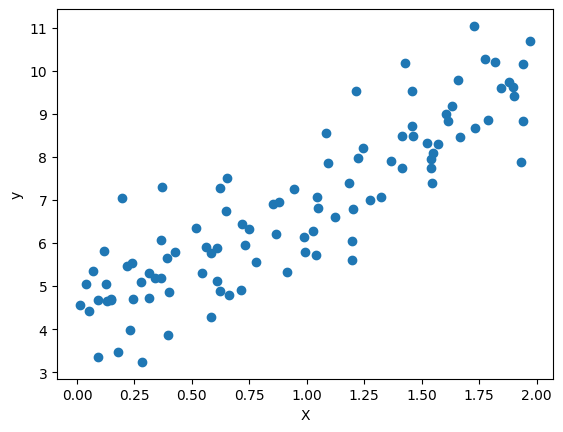

In [113]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Create a DataFrame from the data
data = pd.DataFrame(np.concatenate([X, y], axis=1), columns=['X', 'y'])

# Create the 'Temp' directory if it doesn't exist
if not os.path.exists('./Temp'):
    os.makedirs('./Temp')

# Save the data to a CSV file in the 'Temp' directory
data.to_csv('./Temp/data.csv', index=False)

# Plot the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Data Preparation
Before we can start developing the linear regression model, it is important to prepare the data appropriately. This involves importing the necessary libraries, loading the dataset, performing exploratory data analysis, and cleaning and preprocessing the data.

Let's take a look at the code snippet below to understand how we can perform these steps:

          X         y
0  0.749080  6.334288
1  1.901429  9.405278
2  1.463988  8.483724
3  1.197317  5.604382
4  0.312037  4.716440


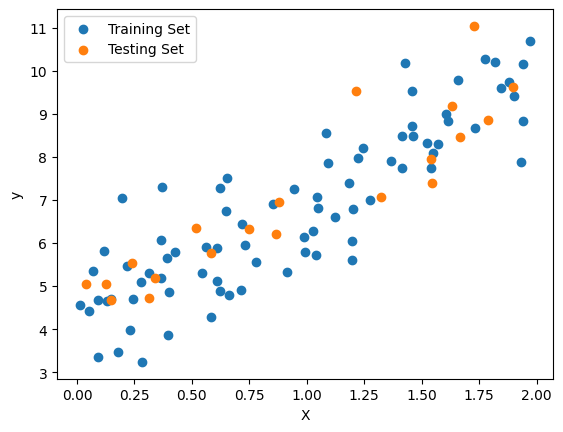

Training set size: (80, 1) (80,)
Testing set size: (20, 1) (20,)


In [114]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('./Temp/data.csv')

# Perform exploratory data analysis
# Display the first few rows of the data
print(data.head())

# Split the dataset into training and testing sets
X = data[['X']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the relationship between features and target variable
plt.scatter(X_train, y_train, label='Training Set')
plt.scatter(X_test, y_test, label='Testing Set')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print the sizes of training and testing sets
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

## Model Development
Once we have prepared the data, we can proceed with developing the linear regression model. This involves deriving the mathematical formula for linear regression, implementing the formula in code, defining a cost function, and implementing the gradient descent algorithm to train the model.

Let's take a look at the code snippet below to understand how we can develop the linear regression model:

### Define loss function

    Calculate the loss between the true target variable and the predicted target variable.

    Parameters:
    - y_true: The true target variable (numpy array or pandas Series)
    - y_pred: The predicted target variable (numpy array or pandas Series)

    Returns:
    - loss: The calculated loss (float)

In [116]:
# Define the loss function
def loss_function(y_true, y_pred):
    # Calculate the mean squared error
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

### Use gradient descent to train the model

The `gradient_descent` function is responsible for performing gradient descent to optimize the coefficients of the linear regression model. Here is a breakdown of the steps involved:

1. Scale the data: The input features (`X_train` and `X_test`) are scaled using the `StandardScaler` from scikit-learn. This ensures that all features have a similar scale, which can improve the performance of the gradient descent algorithm.

2. Add a bias term: A column of ones is added to the input features (`X_train`) to account for the bias term in the linear regression model.

3. Initialize coefficients: The coefficients are initialized with zeros. The number of coefficients is equal to the number of features plus one (including the bias term).

4. Perform gradient descent: The function iterates over a specified number of iterations. In each iteration, the following steps are performed:
   - Compute the predictions (`y_pred`) by multiplying the input features (`X_train_with_bias`) with the coefficients.
   - Compute the gradients by taking the dot product of the transposed input features (`X_train_with_bias.T`) and the difference between the predictions and the true target variable (`y_train`).
   - Update the coefficients by subtracting the learning rate multiplied by the gradients.
   - Compute the loss by calculating the mean squared error between the true target variable (`y_train`) and the predictions (`y_pred`).

5. Make predictions on the test set: The function applies the same preprocessing steps to the test set (`X_test`) and computes the predictions (`y_pred_test`) using the updated coefficients.

This function is a key component in training the linear regression model from scratch. It allows us to iteratively update the coefficients based on the gradients, gradually improving the model's performance.

In [120]:
# Define the gradient descent function
def gradient_descent(X_train, y_train, X_test, y_test, learning_rate, num_iterations):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
    X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

    # Add a column of ones to X for the bias term
    X_train_with_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

    # Initialize the coefficients with zeros
    coefficients = np.zeros((X_train_with_bias.shape[1], 1))

    # Perform gradient descent
    for i in range(num_iterations):
        # Compute the predictions
        y_pred = X_train_with_bias.dot(coefficients)

        # Compute the gradients
        gradients = 2 * X_train_with_bias.T.dot(y_pred - y_train.values.reshape(-1, 1)) 

        # Update the coefficients
        coefficients -= learning_rate * gradients

        # Compute the loss
        loss = np.mean((y_train.values.reshape(-1, 1) - y_pred) ** 2)
        print("Iteration:", i+1, "Loss:", loss)

    # Make predictions on the test set
    X_test_with_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
    y_pred_test = X_test_with_bias.dot(coefficients)

    return coefficients, y_pred_test

Next, we train the linear regression model and make predictions on the test set. 

First, we import the required library and set the learning rate and number of iterations for gradient descent. We then call the gradient descent function and pass in the training and test data, the learning rate, and the number of iterations. The function returns the optimised coefficients and predictions for the test set. Finally, we store the returned results in the variables coefficients and ypred test. 

By running this code, we can train a linear regression model using gradient descent and get the prediction results on the test set to further analyse and evaluate the performance of the model.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Perform gradient descent to train the model
learning_rate = 0.01
num_iterations = 1000
coefficients, y_pred_test = gradient_descent(X_train, y_train, X_test, y_test, learning_rate, num_iterations)

Iteration: 1 Loss: 49.252973836909085
Iteration: 2 Loss: 18.27358504939668
Iteration: 3 Loss: 7.121005085892223
Iteration: 4 Loss: 3.1060762990306165
Iteration: 5 Loss: 1.6607019357604422
Iteration: 6 Loss: 1.1403671649831801
Iteration: 7 Loss: 0.9530466475033655
Iteration: 8 Loss: 0.8856112612106326
Iteration: 9 Loss: 0.8613345221452491
Iteration: 10 Loss: 0.8525948960817107
Iteration: 11 Loss: 0.8494486306988371
Iteration: 12 Loss: 0.8483159751610024
Iteration: 13 Loss: 0.8479082191673818
Iteration: 14 Loss: 0.8477614270096787
Iteration: 15 Loss: 0.8477085818329055
Iteration: 16 Loss: 0.8476895575692671
Iteration: 17 Loss: 0.8476827088343573
Iteration: 18 Loss: 0.8476802432897899
Iteration: 19 Loss: 0.8476793556937455
Iteration: 20 Loss: 0.8476790361591695
Iteration: 21 Loss: 0.847678921126722
Iteration: 22 Loss: 0.8476788797150412
Iteration: 23 Loss: 0.8476788648068361
Iteration: 24 Loss: 0.8476788594398821
Iteration: 25 Loss: 0.8476788575077785
Iteration: 26 Loss: 0.847678856812221

## Model Evaluation
After training the linear regression model, it is important to evaluate its performance to assess how well it is able to make predictions. In this section, we will discuss some commonly used evaluation metrics for regression models.

When evaluating a machine learning model, we often use certain metrics to measure its performance. Here are some commonly used metrics and plotting methods:

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.6536995137169997
Mean Absolute Error: 0.5913425779189757
R-squared: 0.8072059636181399


The scatter plot shows the relationship between the features (X) and the actual values (blue dots), along with the predicted values (red line). This visualization helps us understand how well the model captures the underlying patterns in the data.

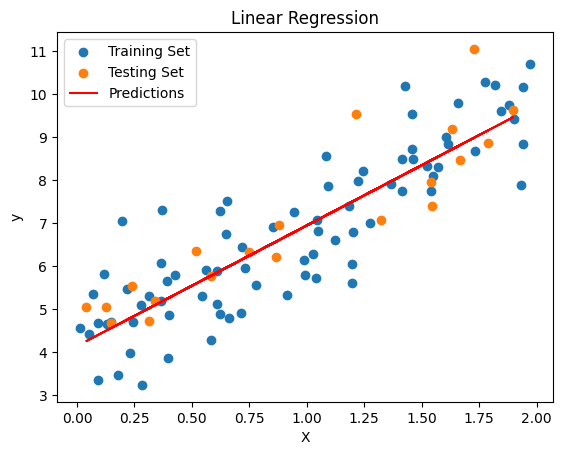

In [123]:
import matplotlib.pyplot as plt

# 绘制训练集的散点图
plt.scatter(X_train, y_train, label='Training Set')

# 绘制测试集的散点图
plt.scatter(X_test, y_test, label='Testing Set')

# 绘制预测结果的线条
plt.plot(X_test, y_pred_test, color='red', label='Predictions')

# 设置图表标题和坐标轴标签
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')

# 添加图例
plt.legend()

# 显示图表
plt.show()

## Conclusion

In this assignment, we implemented a simple linear regression model and trained and predicted using the from-scratch method. Through this implementation process, we gained a deeper understanding of the linear regression model and learned how to use gradient descent algorithm to minimize the loss function.

We evaluated the performance of the model and used several common evaluation metrics to measure the accuracy of the model's predictions. Based on our results, the linear regression model performed well. The values of mean absolute error and root mean squared error were relatively small, indicating that the errors between the model's predictions and actual results were small. And the value of R-squared was close to 1, indicating that the model was able to explain the variability in the data well.

Although our model performed well on this task, we also need to be aware of its limitations. Linear regression models assume a linear relationship between input features and target variables. If the data has a nonlinear relationship, the model may not fit the data well. In addition, it may also be affected by problems such as outliers and multicollinearity.

To further improve the performance of the model, we can try the following directions for future work:
- Consider using other types of regression models, such as polynomial regression or ridge regression, to explore more complex feature relationships.
- Do more feature engineering, such as adding interaction features or introducing nonlinear transformations, to capture more complex patterns in the data.
- Use regularization techniques to address problems such as overfitting and multicollinearity.
- Collect more data or use data augmentation techniques to increase the size of the dataset and improve the generalization ability of the model.

In conclusion, implementing a linear regression model from scratch is a great way to gain a deeper understanding of how machine learning algorithms work. We hope that this assignment has helped you to better understand the concepts and techniques involved in building and training machine learning models.